In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

In [2]:
# Four-bar function

def four_bar(a, b, c, d, alpha, delta, alpha_dot, alpha_double_dot, index):
    k1 = (d**2 + a**2 - b**2 + c**2) / (2 * a * c)
    k2 = d / a
    k3 = d / c

    A = k2 - np.cos(alpha - delta)
    B = -np.sin(alpha - delta)
    C = k1 - k3 * np.cos(alpha - delta)

    dist = C / np.sqrt(A**2 + B**2)

    u = -A * C / (A**2 + B**2)
    v = -B * C / (A**2 + B**2)

    gamma = np.zeros((2, len(alpha)))

    gamma[0, :] = np.arctan(v / u) - np.arccos(dist) + delta + np.pi * (A > 0)
    gamma[1, :] = np.arctan(v / u) + np.arccos(dist) + delta + np.pi * (A > 0)
    
    true_gamma = gamma[index, :]

    true_beta = np.arctan((d * np.sin(delta) + c * np.sin(true_gamma) - a * np.sin(alpha)) / (d * np.cos(delta) + c * np.cos(true_gamma) - a * np.cos(alpha))) + np.pi * ((d * np.cos(delta) + c * np.cos(true_gamma) - a * np.cos(alpha)) < 0)

    true_gamma_dot = a * alpha_dot * np.sin(alpha - true_beta) / (c * np.sin(true_gamma - true_beta))
    
    true_beta_dot = a * alpha_dot * np.sin(alpha - true_gamma) / (b * np.sin(true_gamma - true_beta))

    true_gamma_double_dot = (a * alpha_double_dot * np.sin(alpha - true_beta) + a * alpha_dot**2 * np.cos(alpha - true_beta) + b * true_beta_dot**2 - c * true_gamma_dot**2 * np.cos(true_gamma - true_beta)) / (c * np.sin(true_gamma - true_beta))
    
    true_beta_double_dot = (a * alpha_double_dot * np.sin(alpha - true_gamma) + a * alpha_dot**2 * np.cos(alpha - true_gamma) + b * true_beta_dot**2 * np.cos(true_beta - true_gamma) - c * true_gamma_dot**2) / (b * np.sin(true_gamma - true_beta))

    return true_beta, true_gamma, true_beta_dot, true_gamma_dot, true_beta_double_dot, true_gamma_double_dot

In [3]:
# Fish 3 quantities

conv = 180 / np.pi

a0_ref3 = -3000
a1_ref3 = -60+190j

o_muscle_ref3 = -2940-190j

a_ref3 = 300-950j
b_ref3 = 150+80j
c_ref3 = -700-820j
d_ref3 = 1150-50j

m_ref3 = 1150+870j
r_ref3 = 1150+870j
s_ref3 = 450+50j

r3 = np.abs(r_ref3)
correction3 = 1 / r3
r3 = r3 * correction3

a03 = np.abs(a0_ref3) * correction3
a13 = np.abs(a1_ref3) * correction3

o_muscle_in3 = np.abs(o_muscle_ref3) * correction3

a3 = np.abs(a_ref3) * correction3
b3 = np.abs(b_ref3) * correction3
c3 = np.abs(c_ref3) * correction3
d3 = np.abs(d_ref3) * correction3
d_ang3 = np.angle(d_ref3)

m3 = np.abs(m_ref3) * correction3
s3 = np.abs(s_ref3) * correction3

In [4]:
# solve kinematics

o_contr3 = np.arange(0, 0.011, 0.0005)
delta_o_muscle3 = o_muscle_in3 * o_contr3
o_muscle3 = np.empty_like(o_contr3)
o_muscle3[:len(o_contr3)] = o_muscle_in3 - delta_o_muscle3

a0_ang3 = np.angle(a0_ref3)
a1_ang3 = a0_ang3 - np.arccos((a03**2 + a13**2 - o_muscle3**2) / (2 * a03 * a13))
o_muscle_ang3 = np.arccos((a03 * np.cos(a0_ang3) - a13 * np.cos(a1_ang3)) / o_muscle3) * np.sign((a03 * np.sin(a0_ang3) - a13 * np.sin(a1_ang3)) / o_muscle3)
a_ang3 = a1_ang3 + np.angle(a_ref3) - np.angle(a1_ref3)

o_muscle_dot3 = np.full_like(o_muscle3, -1)
o_muscle_ang_dot3 = o_muscle_dot3 * np.cos(o_muscle_ang3 - a1_ang3) / (o_muscle3 * np.sin(o_muscle_ang3 - a1_ang3))
a1_ang_dot3 = o_muscle_dot3 / (a13 * np.sin(a1_ang3 - o_muscle_ang3))
a_ang_dot3 = a1_ang_dot3

o_muscle_double_dot3 = np.zeros_like(o_muscle3)
a1_ang_double_dot3 = (a13 * o_muscle_double_dot3 * np.sin(a1_ang3 - o_muscle_ang3) - o_muscle_dot3 * np.cos(a1_ang3 - o_muscle_ang3) * (a1_ang_dot3 - o_muscle_ang_dot3)) / ((a13 * np.sin(a1_ang3 - o_muscle_ang3))**2)
a_ang_double_dot3 = a1_ang_double_dot3

b_ang3, c_ang3, b_ang_dot3, c_ang_dot3, b_ang_double_dot3, c_ang_double_dot3 = four_bar(a3, b3, c3, d3, a_ang3, d_ang3, a_ang_dot3, a_ang_double_dot3, 1)

m_ang3 = b_ang3 + np.angle(m_ref3) - np.angle(b_ref3)
r_ang3 = c_ang3 + np.angle(r_ref3) - np.angle(c_ref3)
s_ang3 = c_ang3 + np.angle(s_ref3) - np.angle(c_ref3)

opening_ang3 = r_ang3 - m_ang3 - 2 * np.pi
opening_vel3 = c_ang_dot3 - b_ang_dot3
opening_vel_norm3 = -opening_vel3 / o_muscle_dot3

dist_3 = r3 * np.exp(1j * r_ang3) - m3 * np.exp(1j * m_ang3)
dist3 = np.abs(dist_3)

delta_o_muscle_norm3 = delta_o_muscle3 / r3

c_muscle3 = np.abs(a3 * np.exp(1j * a_ang3) + b3 * np.exp(1j * b_ang3))
c_muscle_ang3 = np.angle(a3 * np.exp(1j * a_ang3) + b3 * np.exp(1j * b_ang3))

In [5]:
# Fish 3 Rolling point
OP3 = np.vstack((np.real(d3 * np.exp(1j * d_ang3) + c3 * np.exp(1j * c_ang3)), np.imag(d3 * np.exp(1j * d_ang3) + c3 * np.exp(1j * c_ang3)), np.zeros(len(o_contr3)))).T

vel_P3 = np.cross(np.hstack((np.zeros((len(o_contr3), 1)), np.zeros((len(o_contr3), 1)), c_ang_dot3.reshape(-1, 1))), np.hstack((np.real(c3 * np.exp(1j * c_ang3)).reshape(-1, 1), np.imag(c3 * np.exp(1j * c_ang3)).reshape(-1, 1), np.zeros((len(o_contr3), 1)))))

omega_P3 = np.hstack((np.zeros((len(o_contr3), 1)), np.zeros((len(o_contr3), 1)), b_ang_dot3.reshape(-1, 1)))

OC3 = (np.cross(omega_P3, vel_P3) / b_ang_dot3.reshape(-1, 1) ** 2) + OP3

<IPython.core.display.Javascript object>


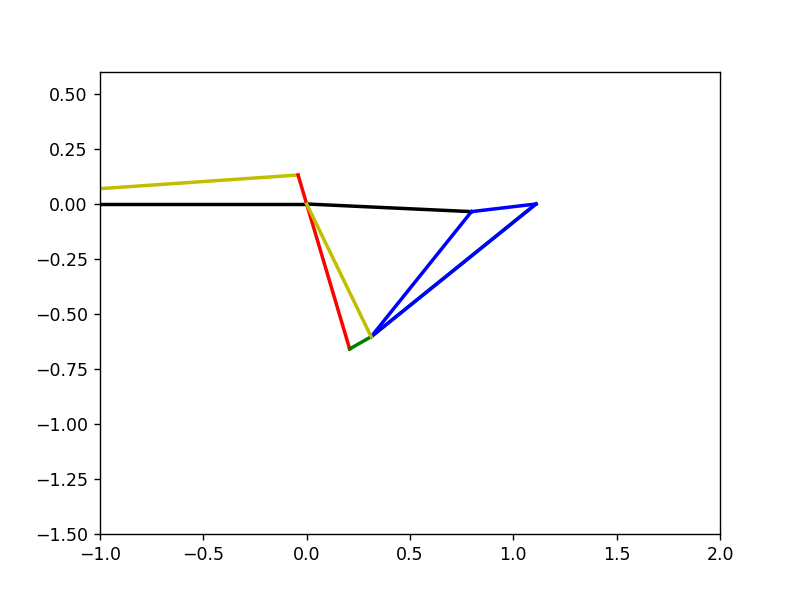

In [6]:
# Fish 3 Position 0 plot

o_muscle3x = np.real(o_muscle3[0] * np.exp(1j * o_muscle_ang3[0]))
o_muscle3y = np.imag(o_muscle3[0] * np.exp(1j * o_muscle_ang3[0]))
a03x = np.real(a03 * np.exp(1j * a0_ang3))
a03y = np.imag(a13 * np.exp(1j * a0_ang3))
a13x = np.real(a13 * np.exp(1j * a1_ang3[0]))
a13y = np.imag(a13 * np.exp(1j * a1_ang3[0]))
    
a3x = np.real(a3 * np.exp(1j * a_ang3[0]))
a3y = np.imag(a3 * np.exp(1j * a_ang3[0]))
b3x = np.real(b3 * np.exp(1j * b_ang3[0]))
b3y = np.imag(b3 * np.exp(1j * b_ang3[0]))
c3x = np.real(c3 * np.exp(1j * c_ang3[0]))
c3y = np.imag(c3 * np.exp(1j * c_ang3[0]))
d3x = np.real(d3 * np.exp(1j * d_ang3))
d3y = np.imag(d3 * np.exp(1j * d_ang3))
    
m3x = np.real(m3 * np.exp(1j * m_ang3[0]))
m3y = np.imag(m3 * np.exp(1j * m_ang3[0]))
r3x = np.real(r3 * np.exp(1j * r_ang3[0]))
r3y = np.imag(r3 * np.exp(1j * r_ang3[0]))
s3x = np.real(s3 * np.exp(1j * s_ang3[0]))
s3y = np.imag(s3 * np.exp(1j * s_ang3[0]))

c_muscle3x = np.real(c_muscle3[0] * np.exp(1j * c_muscle_ang3[0]))
c_muscle3y = np.imag(c_muscle3[0] * np.exp(1j * c_muscle_ang3[0]))

plt.plot([a13x, a13x + o_muscle3x], [a13y, a13y + o_muscle3y], 'y', linewidth=2)
plt.plot([0, a03x], [0, a03y], 'k', linewidth=2)
plt.plot([0, a13x], [0, a13y], 'r', linewidth=2)

plt.plot([0, a3x], [0, a3y], 'r', linewidth=2)
plt.plot([a3x, a3x + b3x], [a3y, a3y + b3y], 'g', linewidth=2)
plt.plot([d3x, d3x + c3x], [d3y, d3y + c3y], 'b', linewidth=2)
plt.plot([0, d3x], [0, d3y], 'k', linewidth=2)
    
plt.plot([a3x + b3x, a3x + b3x + m3x], [a3y + b3y, a3y + b3y + m3y], 'g', linewidth=2)
plt.plot([d3x + c3x, d3x + c3x + r3x], [d3y + c3y, d3y + c3y + r3y], 'b', linewidth=2)
plt.plot([d3x, d3x + s3x], [d3y, d3y + s3y], 'b', linewidth=2)
    
plt.plot([0, c_muscle3x], [0, c_muscle3y], 'y', linewidth=2)

plt.xlim([-1, 2])
plt.ylim([-1.5, 0.6])    
    
plt.show()

<IPython.core.display.Javascript object>


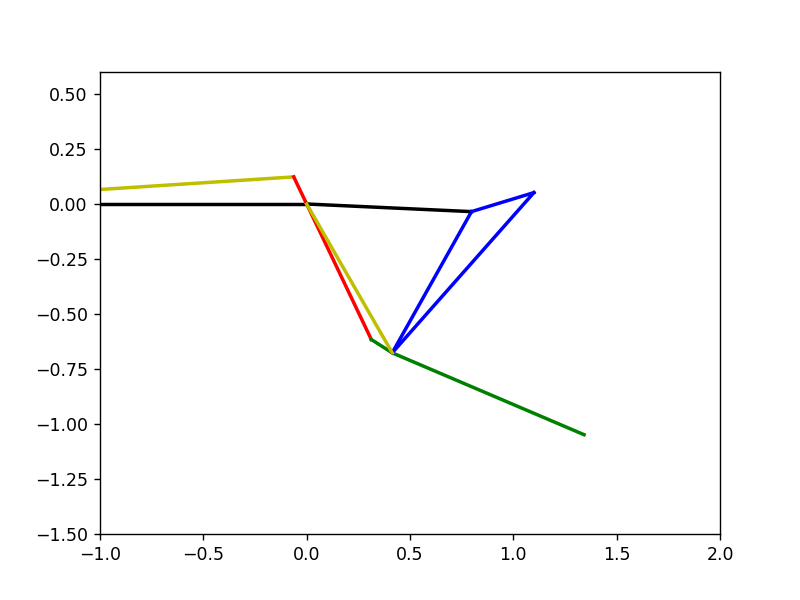

In [7]:
# Fish 3 Opening animation

fig, ax = plt.subplots()

def update(i):
    ax.clear()  # Clear the previous frame
    # Plot your data here
    o_muscle3x = np.real(o_muscle3[i] * np.exp(1j * o_muscle_ang3[i]))
    o_muscle3y = np.imag(o_muscle3[i] * np.exp(1j * o_muscle_ang3[i]))
    a03x = np.real(a03 * np.exp(1j * a0_ang3))
    a03y = np.imag(a13 * np.exp(1j * a0_ang3))
    a13x = np.real(a13 * np.exp(1j * a1_ang3[i]))
    a13y = np.imag(a13 * np.exp(1j * a1_ang3[i]))
    
    a3x = np.real(a3 * np.exp(1j * a_ang3[i]))
    a3y = np.imag(a3 * np.exp(1j * a_ang3[i]))
    b3x = np.real(b3 * np.exp(1j * b_ang3[i]))
    b3y = np.imag(b3 * np.exp(1j * b_ang3[i]))
    c3x = np.real(c3 * np.exp(1j * c_ang3[i]))
    c3y = np.imag(c3 * np.exp(1j * c_ang3[i]))
    d3x = np.real(d3 * np.exp(1j * d_ang3))
    d3y = np.imag(d3 * np.exp(1j * d_ang3))
    
    m3x = np.real(m3 * np.exp(1j * m_ang3[i]))
    m3y = np.imag(m3 * np.exp(1j * m_ang3[i]))
    r3x = np.real(r3 * np.exp(1j * r_ang3[i]))
    r3y = np.imag(r3 * np.exp(1j * r_ang3[i]))
    s3x = np.real(s3 * np.exp(1j * s_ang3[i]))
    s3y = np.imag(s3 * np.exp(1j * s_ang3[i]))

    c_muscle3x = np.real(c_muscle3[i] * np.exp(1j * c_muscle_ang3[i]))
    c_muscle3y = np.imag(c_muscle3[i] * np.exp(1j * c_muscle_ang3[i]))

    plt.plot([a13x, a13x + o_muscle3x], [a13y, a13y + o_muscle3y], 'y', linewidth=2)
    plt.plot([0, a03x], [0, a03y], 'k', linewidth=2)
    plt.plot([0, a13x], [0, a13y], 'r', linewidth=2)

    plt.plot([0, a3x], [0, a3y], 'r', linewidth=2)
    plt.plot([a3x, a3x + b3x], [a3y, a3y + b3y], 'g', linewidth=2)
    plt.plot([d3x, d3x + c3x], [d3y, d3y + c3y], 'b', linewidth=2)
    plt.plot([0, d3x], [0, d3y], 'k', linewidth=2)
    
    plt.plot([a3x + b3x, a3x + b3x + m3x], [a3y + b3y, a3y + b3y + m3y], 'g', linewidth=2)
    plt.plot([d3x + c3x, d3x + c3x + r3x], [d3y + c3y, d3y + c3y + r3y], 'b', linewidth=2)
    plt.plot([d3x, d3x + s3x], [d3y, d3y + s3y], 'b', linewidth=2)
    
    plt.plot([0, c_muscle3x], [0, c_muscle3y], 'y', linewidth=2)

    plt.xlim([-1, 2])
    plt.ylim([-1.5, 0.6])   

# Create the animation
ani = FuncAnimation(fig, update, frames=len(a_ang3), repeat=False)

# Display the animation
plt.show()

<IPython.core.display.Javascript object>


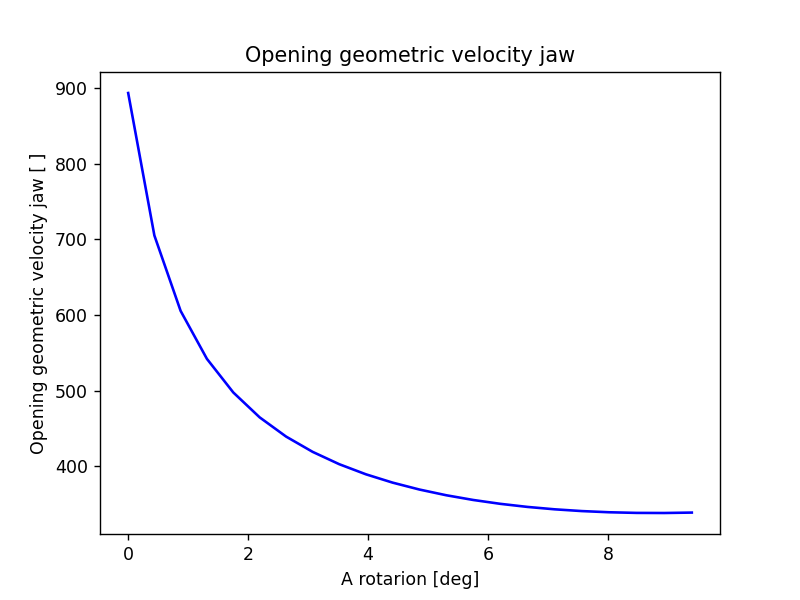

<IPython.core.display.Javascript object>


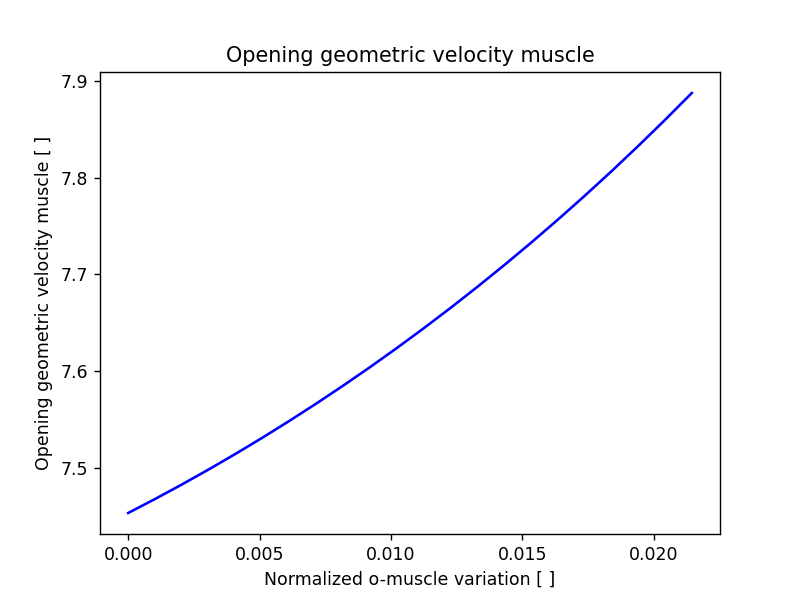

In [8]:
# Fish 3 mechanical parameters

# Jaw linkage
o_geom_vel_jaw3 = opening_vel3 * a_ang_dot3

plt.figure()
plt.plot((a_ang3-a_ang3[0])*conv, o_geom_vel_jaw3,'b')
plt.title('Opening geometric velocity jaw')
plt.xlabel('A rotarion [deg]')
plt.ylabel('Opening geometric velocity jaw [ ]')

# Muscle linkage
k_m3 = (a_ang3-a_ang3[0])*conv

o_geom_vel_muscle3 = -(a_ang_dot3/o_muscle_dot3)

plt.figure()
plt.plot(delta_o_muscle_norm3, o_geom_vel_muscle3, 'b')
plt.title('Opening geometric velocity muscle')
plt.xlabel('Normalized o-muscle variation [ ]')
plt.ylabel('Opening geometric velocity muscle [ ]')

plt.show()

<IPython.core.display.Javascript object>


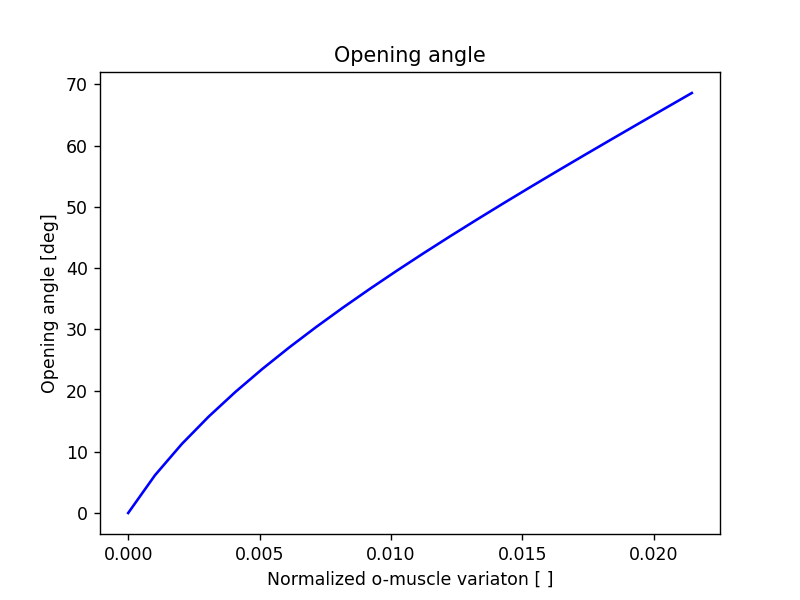

<IPython.core.display.Javascript object>


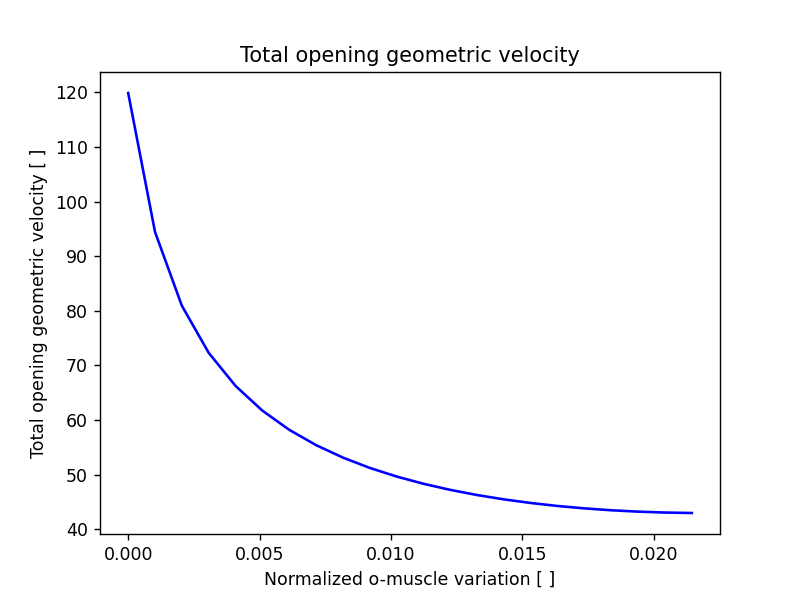

<IPython.core.display.Javascript object>


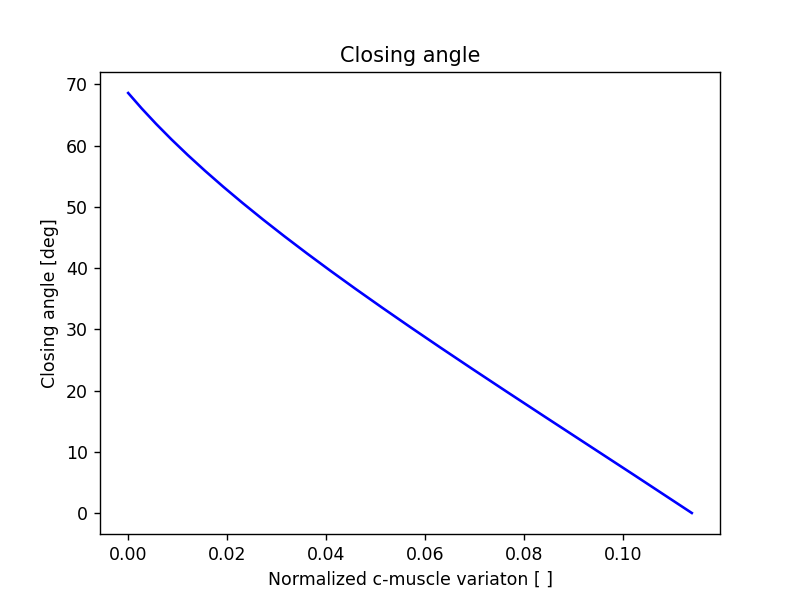

<IPython.core.display.Javascript object>


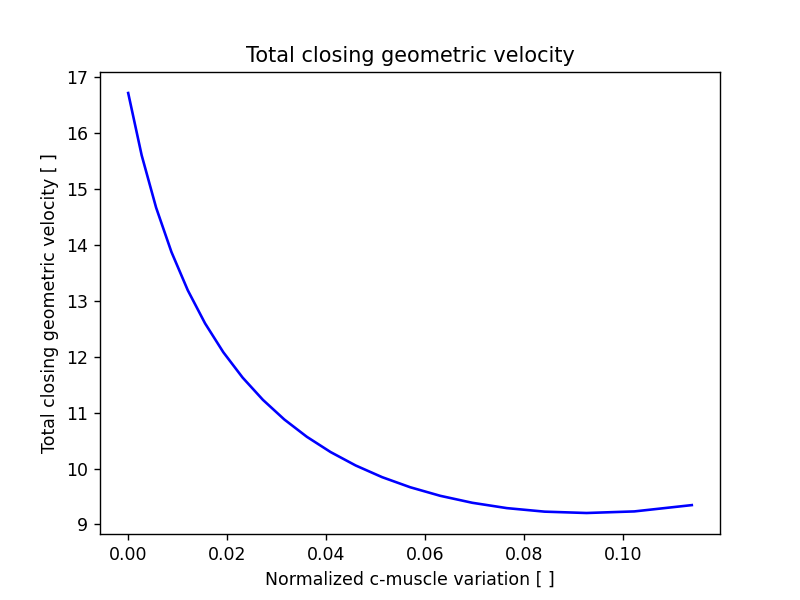

In [9]:
# Opening plot

plt.figure()
plt.plot(delta_o_muscle_norm3,(opening_ang3)*conv, 'b')
plt.title('Opening angle')
plt.xlabel('Normalized o-muscle variaton [ ]')
plt.ylabel('Opening angle [deg]')

plt.figure()
plt.plot(delta_o_muscle_norm3,opening_vel_norm3,'b')
plt.title('Total opening geometric velocity')
plt.xlabel('Normalized o-muscle variation [ ]')
plt.ylabel('Total opening geometric velocity [ ]')

# Closing plot

delta_c_muscle3 = (c_muscle3[-1]-c_muscle3)
delta_c_muscle_norm3 = delta_c_muscle3
c_contr3 = delta_c_muscle3/c_muscle3[-1]

c_muscle_dot3 = (a3*a_ang_dot3*np.cos(a_ang3)+b3*b_ang_dot3*np.cos(b_ang3))*np.sin(c_muscle_ang3)-(a3*a_ang_dot3*np.sin(a_ang3)+b3*b_ang_dot3*np.sin(b_ang3))*np.cos(c_muscle_ang3)
c_muscle_ang_dot3 = (c_muscle_dot3*np.cos(c_muscle_ang3)+a3*a_ang_dot3*np.sin(a_ang3)+b3*b_ang_dot3*np.sin(b_ang3))/(c_muscle3*np.sin(c_muscle_ang3))

plt.figure()
plt.plot(delta_c_muscle_norm3,(opening_ang3)*conv,'b')
plt.title('Closing angle')
plt.xlabel('Normalized c-muscle variaton [ ]')
plt.ylabel('Closing angle [deg]')

closing_vel_norm3 = (opening_vel3/c_muscle_dot3)

plt.figure()
plt.plot(delta_c_muscle_norm3,closing_vel_norm3,'b')
plt.title('Total closing geometric velocity')
plt.xlabel('Normalized c-muscle variation [ ]')
plt.ylabel('Total closing geometric velocity [ ]')

plt.show()

delta_c_muscle_neg3 = (c_muscle3[0]-c_muscle3)
delta_c_muscle_neg_norm3 = delta_c_muscle_neg3
c_contr_neg3 = delta_c_muscle_neg3/c_muscle3[-1]

<IPython.core.display.Javascript object>


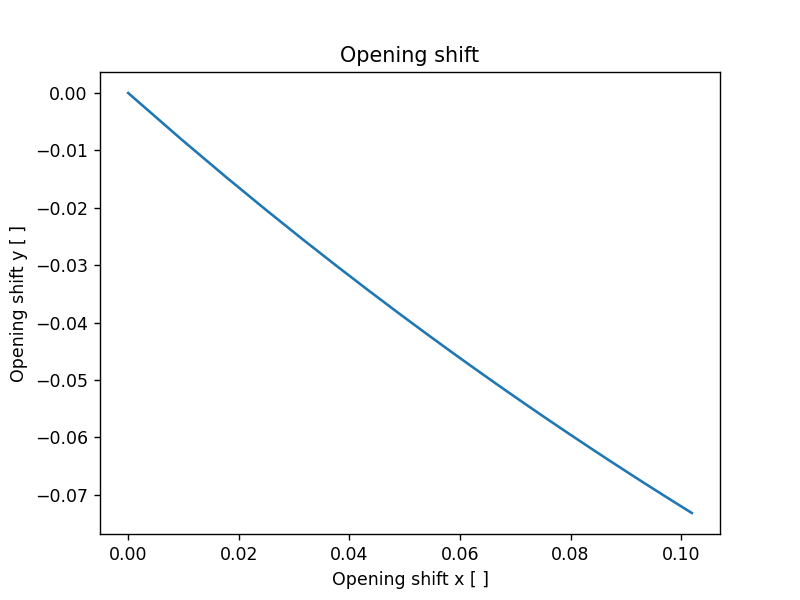

<IPython.core.display.Javascript object>


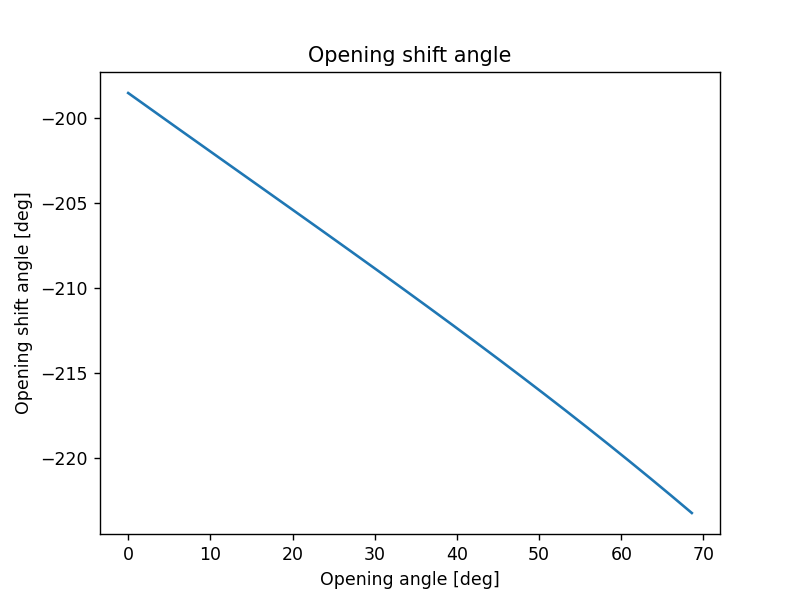

In [11]:
# Translation

trasl3x = np.real(a3*np.exp(1j*a_ang3)+b3*np.exp(1j*b_ang3))-np.real(a3*np.exp(1j*a_ang3[0])+b3*np.exp(1j*b_ang3[0]))
trasl3y = np.imag(a3*np.exp(1j*a_ang3)+b3*np.exp(1j*b_ang3))-np.imag(a3*np.exp(1j*a_ang3[0])+b3*np.exp(1j*b_ang3[0]))
trasl_ang3 = ((r_ang3+m_ang3)/2)-((r_ang3[0]+m_ang3[0]/2))

plt.figure()
plt.plot(trasl3x,trasl3y)
plt.title('Opening shift')
plt.xlabel('Opening shift x [ ]')
plt.ylabel('Opening shift y [ ]')
                             
plt.figure()
plt.plot((opening_ang3)*conv,trasl_ang3*conv)
plt.title('Opening shift angle')
plt.xlabel('Opening angle [deg]')
plt.ylabel('Opening shift angle [deg]')
                             
plt.show()

<IPython.core.display.Javascript object>


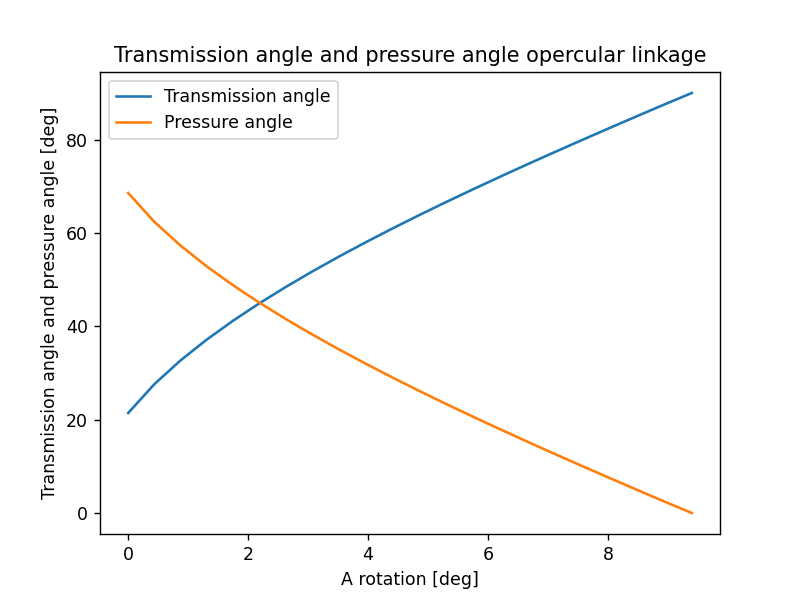

<IPython.core.display.Javascript object>


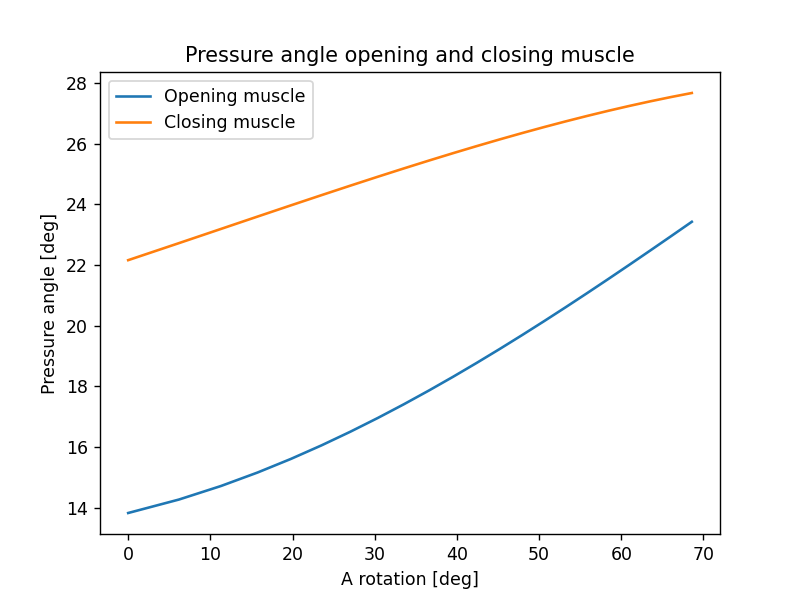

In [12]:
# Transmission angle

mi3 = (c_ang3-np.pi-b_ang3)*((c_ang3-np.pi-b_ang3)<np.pi/2)+(b_ang3+2*np.pi-c_ang3)*((c_ang3-np.pi-b_ang3)>np.pi/2)
theta3=np.pi/2-mi3

plt.figure()
plt.plot((a_ang3-a_ang3[0])*conv,mi3*conv, label = 'Transmission angle')
plt.plot((a_ang3-a_ang3[0])*conv,theta3*conv, label = 'Pressure angle')
plt.title('Transmission angle and pressure angle opercular linkage')
plt.xlabel('A rotation [deg]')
plt.ylabel('Transmission angle and pressure angle [deg]')
plt.legend()

# Pressure angle muscles

theta_o_muscle3 = np.abs(a1_ang3-3*np.pi/2-o_muscle_ang3)
theta_c_muscle3 = np.abs(c_ang3-3*np.pi/2-c_muscle_ang3)

plt.figure()
plt.plot(opening_ang3*conv,theta_o_muscle3*conv, label = 'Opening muscle')
plt.plot(opening_ang3*conv,theta_c_muscle3*conv, label = 'Closing muscle')
plt.title('Pressure angle opening and closing muscle')
plt.xlabel('A rotation [deg]')
plt.ylabel('Pressure angle [deg]')
plt.legend()

plt.show()

In [13]:
# Opening and closing velocities

o_vel_dim3 = opening_vel_norm3*o_muscle3[0]
c_vel_dim3 = closing_vel_norm3*c_muscle3[-1]

true_o_angular_vel3=1.3
true_c_angular_vel3=1.3

# Geometric velocity adimensional

opening_geometric_vel3 = opening_vel3/a_ang_dot3
closing_geometric_vel3 = opening_vel3/c_ang_dot3